In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from aquire import get_titanic_data
from prepare import train_validate_test_split

df = get_titanic_data()
df = df.drop(columns='deck')
df = df[~ df.age.isna()]
df = df[~ df.embarked.isna()]

train, validate, test = train_validate_test_split(df)

In [4]:
train.head(), validate.head(), test.head()

(     passenger_id  survived  pclass   sex   age  sibsp  parch   fare embarked  \
 450           450         0       2  male  36.0      1      2  27.75        S   
 543           543         1       2  male  32.0      1      0  26.00        S   
 157           157         0       3  male  30.0      0      0   8.05        S   
 462           462         0       1  male  47.0      0      0  38.50        S   
 397           397         0       2  male  46.0      0      0  26.00        S   
 
       class  embark_town  alone  
 450  Second  Southampton      0  
 543  Second  Southampton      0  
 157   Third  Southampton      1  
 462   First  Southampton      1  
 397  Second  Southampton      1  ,
      passenger_id  survived  pclass     sex   age  sibsp  parch     fare  \
 610           610         0       3  female  39.0      1      5  31.2750   
 56             56         1       2  female  21.0      0      0  10.5000   
 664           664         1       3    male  20.0      1      0

In [14]:
train.survived.value_counts()

0    237
1    161
Name: survived, dtype: int64

<AxesSubplot:>

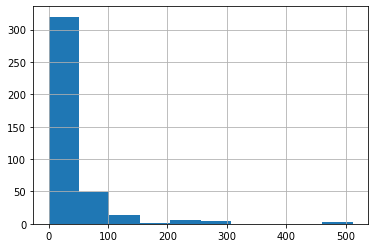

In [15]:
train.fare.hist()

In [26]:
train.fare.value_counts(ascending = False).head()

13.000    22
26.000    17
8.050     16
10.500    14
7.925     12
Name: fare, dtype: int64

Text(0.5, 0, 'Survived')

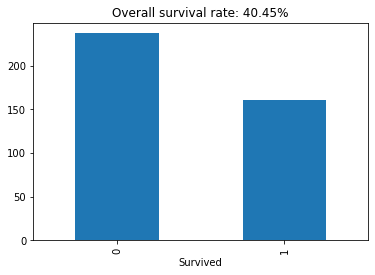

In [6]:
train.survived.value_counts().sort_index().plot.bar()
survival_rate = train.survived.mean()
plt.title(f"Overall survival rate: {survival_rate:.2%}")
plt.xlabel('Survived')

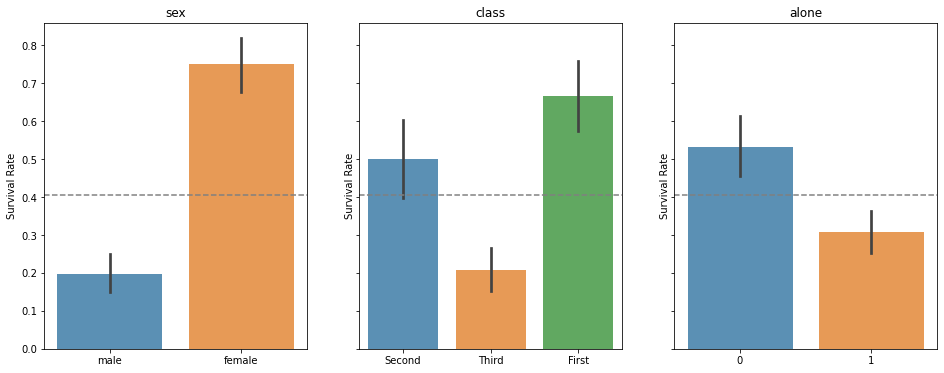

In [28]:
features = ['sex', 'class', 'alone']

survival_rate = train.survived.mean()
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Survival Rate')
    ax[i].set_title(feature)
    ax[i].axhline(survival_rate, ls='--', color='grey')

<AxesSubplot:xlabel='pclass', ylabel='count'>

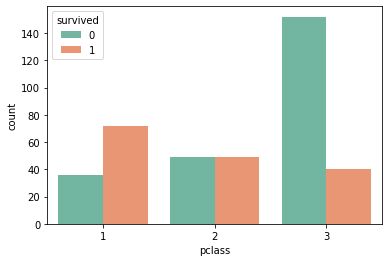

In [41]:
sns.countplot(x='pclass', data=train, hue='survived', palette='Set2')

In [51]:
### continuious vs continuious 

<AxesSubplot:xlabel='age', ylabel='fare'>

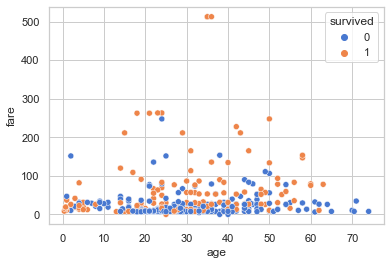

In [53]:
sns.scatterplot(x='age', y='fare', hue= 'survived', data = train)

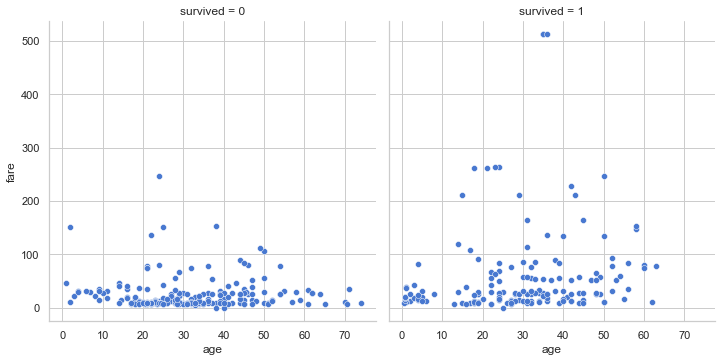

In [55]:
#col is a discrete variable feature in our dataset
sns.relplot(x='age', y='fare', col= 'survived', data = train)

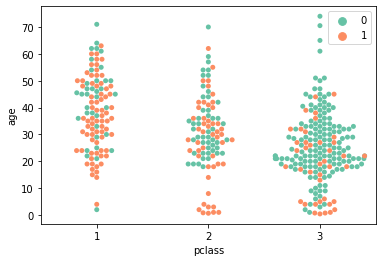

In [42]:
sns.swarmplot(x="pclass", y="age", data=train, hue="survived", palette="Set2")
plt.legend()

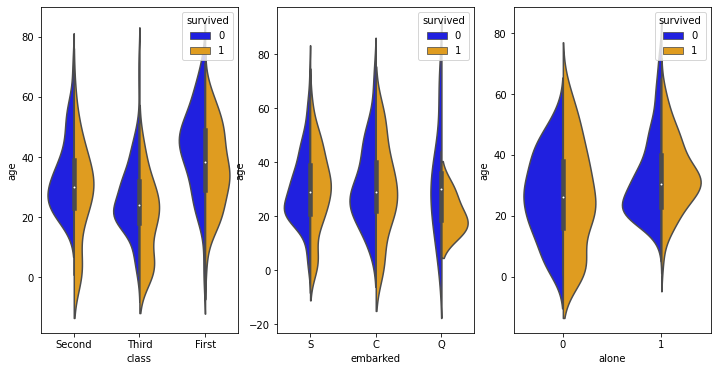

In [43]:
features = ["class", "embarked", "alone"]
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "age",
        hue="survived",
        data=train,
        split=True,
        ax=ax[i],
        palette=["blue", "orange"],
    )

In [45]:
pd.crosstab(train.pclass, train.survived, margins=True)

survived,0,1,All
pclass,,,
1,36,72,108
2,49,49,98
3,152,40,192
All,237,161,398


(0.0, 175.0)

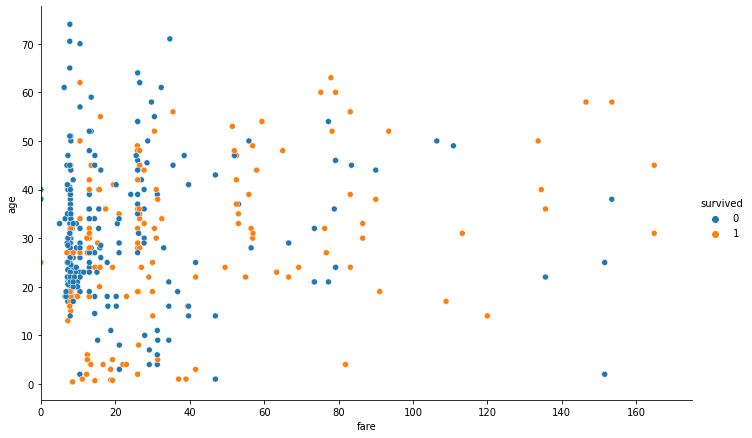

In [46]:
sns.relplot(x="fare", y="age", hue="survived", data=train, height=6, aspect=1.6)
plt.xlim(0, 175)

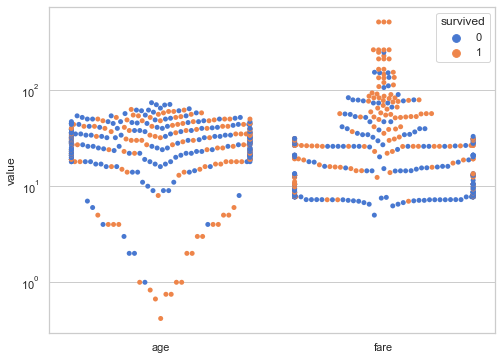

In [47]:
sns.set(style="whitegrid", palette="muted")

# Melt the dataset to "long-form" representation
melt = train[['survived', 'age', 'fare']].melt(id_vars="survived", var_name="measurement")

plt.figure(figsize=(8,6))
p = sns.swarmplot(
    x="measurement",
    y="value",
    hue="survived",
    data=melt,
)
p.set(yscale="log", xlabel='')
plt.show()

In [50]:
from scipy import stats

stats.ttest_ind(
    train[train.survived == 1].age.dropna(),
    train[train.survived == 0].age.dropna(),
)

Ttest_indResult(statistic=-0.8137563508309718, pvalue=0.41627357274555576)

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
# Exercises
#Continue in your classification_exercises.ipynb notebook. Use the iris dataset. 
# As always, add, commit, and push your changes.

In [68]:
#1) Split your data into train, validate, and test samples.
from aquire import get_iris_data
from prepare import split
df = get_iris_data()
df = df.drop(columns='species_id')
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [60]:
plt.rc('font', size = 12)
plt.rc('figure', figsize= (12, 8))

In [74]:
train, validate, test = split(df)

In [75]:
train.shape, validate.shape, test.shape

((105, 5), (45, 5), (45, 5))

In [76]:
train.head(), validate.head(), test.head()

(    species_name  sepal_length  sepal_width  petal_length  petal_width
 114    virginica           5.8          2.8           5.1          2.4
 136    virginica           6.3          3.4           5.6          2.4
 53    versicolor           5.5          2.3           4.0          1.3
 19        setosa           5.1          3.8           1.5          0.3
 38        setosa           4.4          3.0           1.3          0.2,
     species_name  sepal_length  sepal_width  petal_length  petal_width
 72    versicolor           6.3          2.5           4.9          1.5
 112    virginica           6.8          3.0           5.5          2.1
 132    virginica           6.4          2.8           5.6          2.2
 88    versicolor           5.6          3.0           4.1          1.3
 37        setosa           4.9          3.6           1.4          0.1,
     species_name  sepal_length  sepal_width  petal_length  petal_width
 72    versicolor           6.3          2.5           4.9    

In [10]:
#2) Create a swarmplot using a melted dataframe of all your numeric variables. 
# The x-axis should be the variable name, the y-axis the measure. 
# Add another dimension using color to represent species. Document takeaways from 
# this visualization.

In [71]:
iris_melt = test.melt(id_vars=['species_name'], var_name='variable_name', value_name='measure')
iris_melt

,species_name,variable_name,measure
0,versicolor,sepal_length,6.3
1,virginica,sepal_length,6.8
2,virginica,sepal_length,6.4
3,versicolor,sepal_length,5.6
4,setosa,sepal_length,4.9
...,...,...,...
175,versicolor,petal_width,1.0
176,setosa,petal_width,0.2
177,virginica,petal_width,2.3
178,virginica,petal_width,2.3


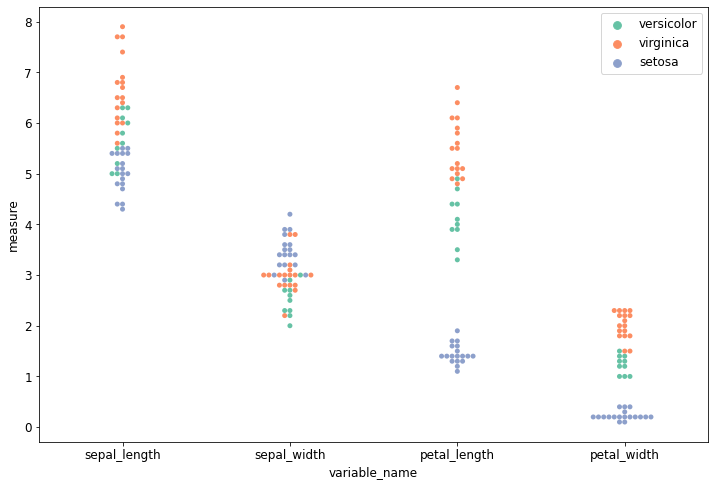

In [79]:
sns.swarmplot(x="variable_name", y="measure", data=iris_melt, hue="species_name", palette="Set2")
plt.legend() 
plt.show()

In [77]:
# Takeaways 
# Petal length and width are the major identifier for the diffrent types of species
# All have similar sepal widths
# Could sepeal and petal area be useful? (yes)

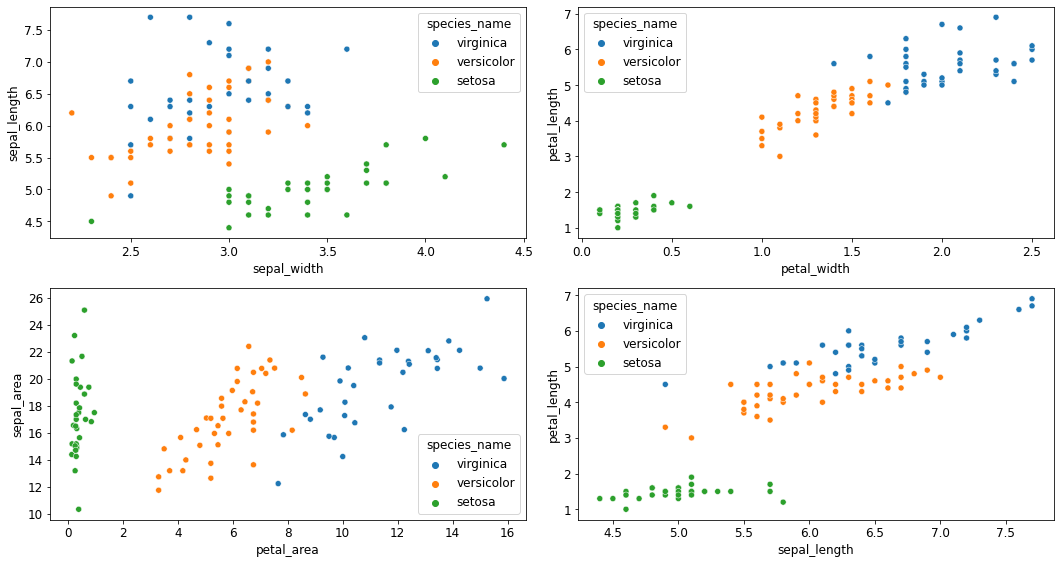

In [92]:
#3) Create 4 subplots (2 rows x 2 columns) of scatterplots.

    # sepal_length x sepal_width
    
    # petal_length x petal_width
    
    # sepal_area x petal_area
    
    # sepal_length x petal_length
    
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

plt.figure(figsize = (15,8))

plt.subplot(221)
sns.scatterplot(y = 'sepal_length', x = 'sepal_width', data = train, hue = 'species_name')

plt.subplot(222)
sns.scatterplot(y = 'petal_length', x = 'petal_width', data = train, hue = 'species_name')

plt.subplot(223)
sns.scatterplot(y = 'sepal_area', x = 'petal_area', data = train,hue = 'species_name')

plt.subplot(224)
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = train, hue = 'species_name')

plt.tight_layout()
plt.show()

In [ ]:
# Takeaways 
# sepal length is useful 
# sepal width is useful 
# some separating between blue and oreange
# setosa has the smallest petals, viginica has the largest petals

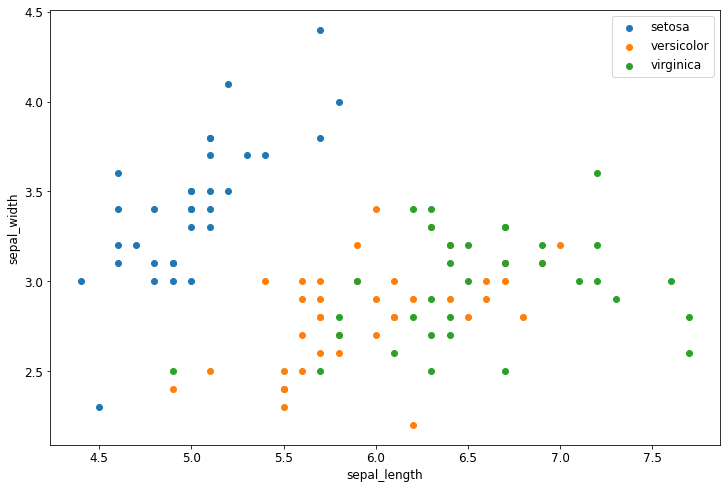

In [90]:
def scatter_by_species(x, y):
    for species, subset in train.groupby('species_name'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

# test it with one plot
scatter_by_species('sepal_length', 'sepal_width')

In [52]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
sepal_length,1.000000,-0.159410,0.873227,0.804330,0.840313,0.672295
sepal_width,-0.159410,1.000000,-0.442854,-0.367006,-0.302707,0.619299
petal_length,0.873227,-0.442854,1.000000,0.958673,0.954201,0.368446
petal_width,0.804330,-0.367006,0.958673,1.000000,0.979145,0.377738
petal_area,0.840313,-0.302707,0.954201,0.979145,1.000000,0.449994
sepal_area,0.672295,0.619299,0.368446,0.377738,0.449994,1.000000


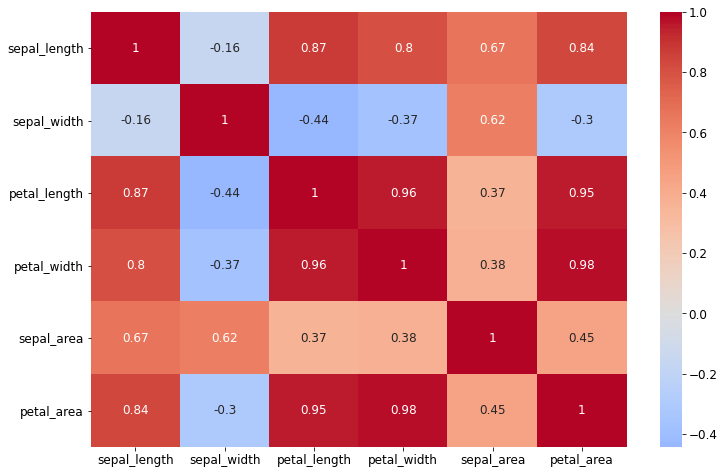

In [94]:
#4) Create a heatmap of each variable layering correlation coefficient on top.
plt.figure(figsize = (12,8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', center = 0)
plt.show()

# Dont put this in presetation! Only good for exploratory data

In [ ]:
# Take away
# most measures correlate together
# no correaltion in sepal lenght an sepal width
# negative corr: wider speals ==> shoter an dnarrower petals

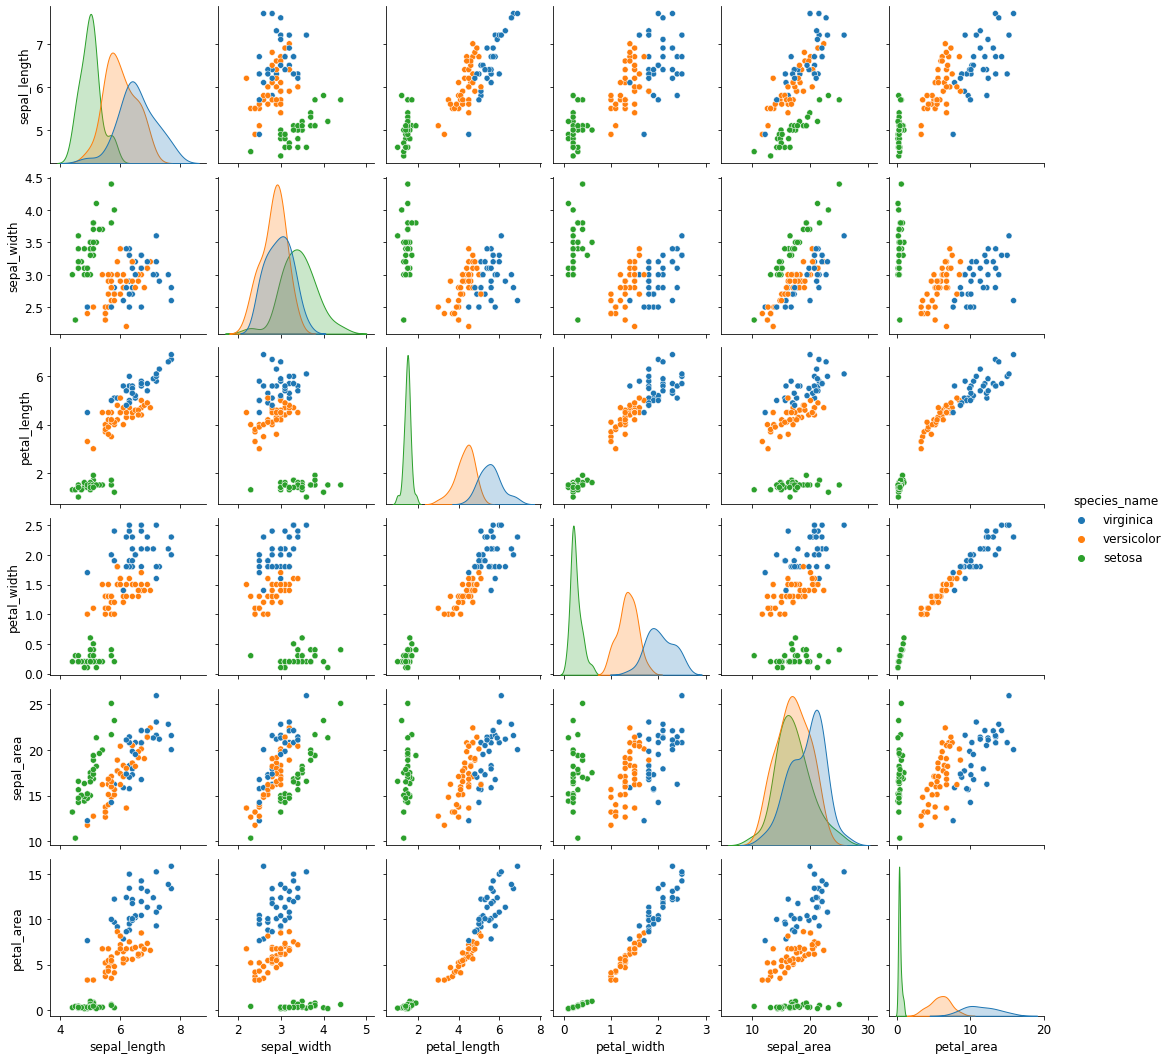

In [96]:
#5) Create a scatter matrix visualizing the interaction of each variable.
sns.pairplot(data = train, hue = 'species_name')

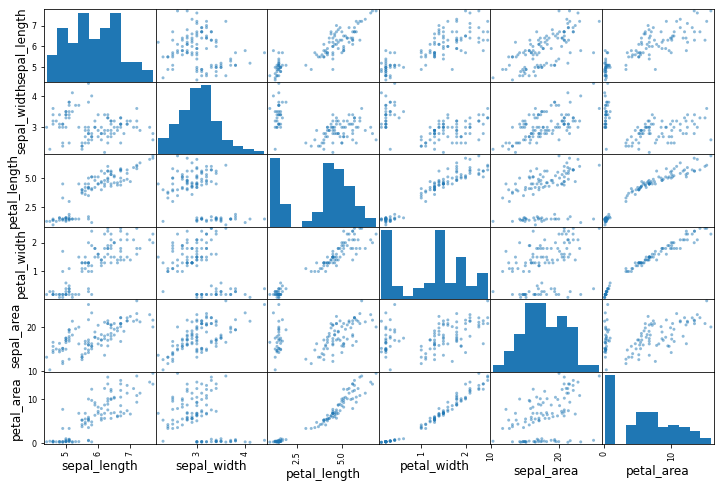

In [97]:
pd.plotting.scatter_matrix(train)
plt.show()

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

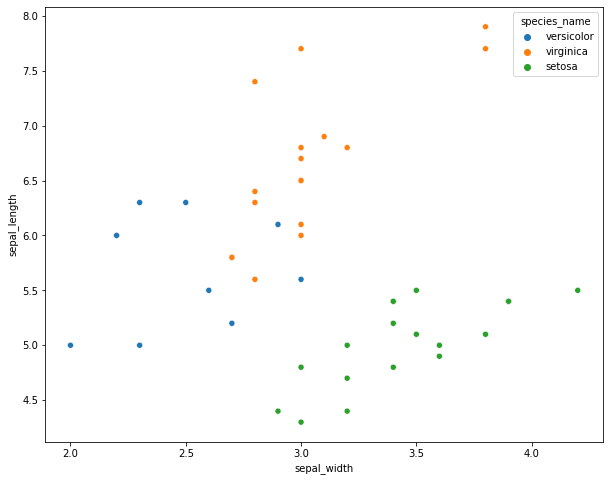

In [108]:
#6) Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

# Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
    # Ho = 'There is no significant difference in sepal length between virginical and versicolor'
    # Ha = 'The speal lenght of the virginica species differs greatly when copared to the sepal length of versicolor'

# What is your takeaway from this statistical testing?
plt.figure(figsize = (10,8))

sns.scatterplot(y = 'sepal_length', x = 'sepal_width', data = test, hue = 'species_name')

In [27]:
#7) Create any other visualizations and run any other statistical tests you 
# think will be helpful in exploring this data set.

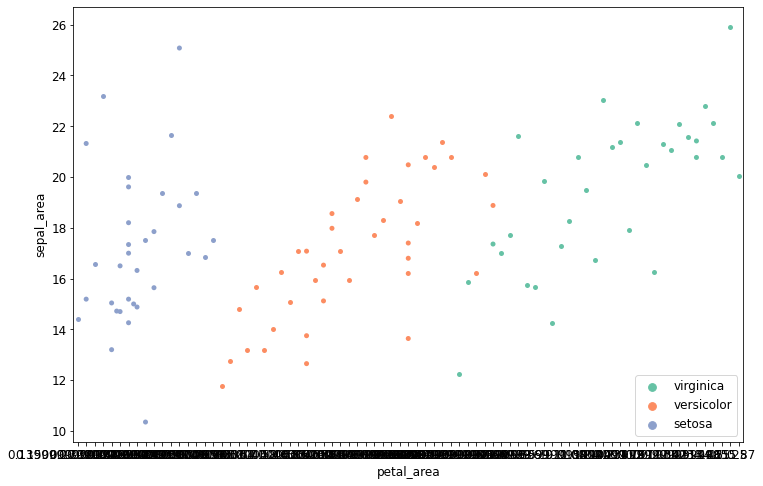

In [88]:
sns.swarmplot(x="petal_area", y="sepal_area", data=train, hue="species_name", palette="Set2")
plt.legend() 
plt.show()

In [ ]:
# Sepal area is also a strong way to identify each type of species